In [2]:
import numpy as np
from matplotlib import pyplot as pp
from sklearn import svm, datasets

In [3]:
lin=datasets.load_linnerud()
lin

{'DESCR': 'Linnerrud dataset\n=================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 20\n    :Number of Attributes: 3\n    :Missing Attribute Values: None\n\nThe Linnerud dataset constains two small dataset:\n\n- *exercise*: A list containing the following components: exercise data with\n  20 observations on 3 exercise variables: Weight, Waist and Pulse.\n\n- *physiological*: Data frame with 20 observations on 3 physiological variables:\n   Chins, Situps and Jumps.\n\nReferences\n----------\n  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.\n',
 'data': array([[   5.,  162.,   60.],
        [   2.,  110.,   60.],
        [  12.,  101.,  101.],
        [  12.,  105.,   37.],
        [  13.,  155.,   58.],
        [   4.,  101.,   42.],
        [   8.,  101.,   38.],
        [   6.,  125.,   40.],
        [  15.,  200.,   40.],
        [  17.,  251.,  250.],
        [  17.,  120.,   38.],
        [  13.,  210.,  11

In [4]:
x = lin.data[:, :2]  
y = lin.target[:, :1].ravel()
print(x)
print(y)

[[   5.  162.]
 [   2.  110.]
 [  12.  101.]
 [  12.  105.]
 [  13.  155.]
 [   4.  101.]
 [   8.  101.]
 [   6.  125.]
 [  15.  200.]
 [  17.  251.]
 [  17.  120.]
 [  13.  210.]
 [  14.  215.]
 [   1.   50.]
 [   6.   70.]
 [  12.  210.]
 [   4.   60.]
 [  11.  230.]
 [  15.  225.]
 [   2.  110.]]
[ 191.  189.  193.  162.  189.  182.  211.  167.  176.  154.  169.  166.
  154.  247.  193.  202.  176.  157.  156.  138.]


In [5]:
def fun(x, y):  #kernel
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(x, M), y.T)

In [6]:
h=0.5

In [10]:
clf = svm.SVC(kernel=fun)
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function fun at 0x000001774BC3AD90>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [11]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print("xmin= ",x_min,"\txmax= ",x_max)
print("ymin= ",y_min,"\tymax= ",y_max)
print("xx= ",xx,"\nyy= ",yy)
print("z= ",z)

xmin=  0.0 	xmax=  18.0
ymin=  49.0 	ymax=  252.0
xx=  [[  0.    0.5   1.  ...,  16.5  17.   17.5]
 [  0.    0.5   1.  ...,  16.5  17.   17.5]
 [  0.    0.5   1.  ...,  16.5  17.   17.5]
 ..., 
 [  0.    0.5   1.  ...,  16.5  17.   17.5]
 [  0.    0.5   1.  ...,  16.5  17.   17.5]
 [  0.    0.5   1.  ...,  16.5  17.   17.5]] 
yy=  [[  49.    49.    49.  ...,   49.    49.    49. ]
 [  49.5   49.5   49.5 ...,   49.5   49.5   49.5]
 [  50.    50.    50.  ...,   50.    50.    50. ]
 ..., 
 [ 250.5  250.5  250.5 ...,  250.5  250.5  250.5]
 [ 251.   251.   251.  ...,  251.   251.   251. ]
 [ 251.5  251.5  251.5 ...,  251.5  251.5  251.5]]
z=  [ 247.  247.  247. ...,  154.  154.  154.]


In [12]:
z = z.reshape(xx.shape)
print(z)
pp.pcolormesh(xx, yy, z, cmap=pp.cm.Paired)

[[ 247.  247.  247. ...,  193.  193.  193.]
 [ 247.  247.  247. ...,  193.  193.  193.]
 [ 247.  247.  247. ...,  193.  193.  193.]
 ..., 
 [ 157.  157.  157. ...,  154.  154.  154.]
 [ 157.  157.  157. ...,  154.  154.  154.]
 [ 157.  157.  157. ...,  154.  154.  154.]]


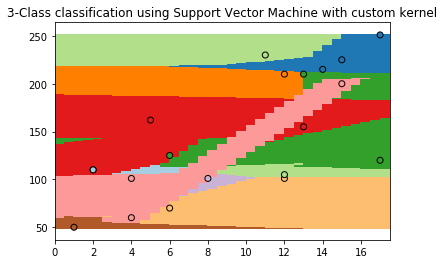

In [13]:
pp.scatter(x[:, 0], x[:, 1], c=y, cmap=pp.cm.Paired, edgecolors='k')
pp.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
pp.axis('tight')
pp.show()